# DSCI 100 Project: Predicting Heart Disease Diagnoses with Data and Classification Models


# Introduction:

Everyone has at some point heard, either from a doctor or a person who has visited one, about the risk factors that lead to heart disease. Most professionals cite things like blood pressure, obesity, blood sugar level, diabetes, blood-cholesterol concentration and the like as factors that cause heart disease. With this in mind, we'll be working with the UC Irvine Heart Disease dataset to answer our question: **Can age, cholesterol levels and maximum heart rate be used to predict a heart disease diagnosis using K-NN classification?**


The dataset contains fourteen variables age, sex, chest pain type, resting blood pressure in mmHg(millimeters of mercury), cholesterol levels in mg/dl(milligrams per deciliter), whether the patient's fasting blood sugar is above 120mg/dl, type of resting electrocardiographic results, patient's maximum heart rate(bpm), whether exercise induced chest pain in a patient, the ST depression induced by exercise, the slope of the ST segment at peak exercise, the amount of blood vessels analyzed for a patient, whether the patient has Thalassemia(blood disorder), and finally heart disease diagnosis.

# Methods and Results

We will now conduct the data analysis, explaining every step as we go...

**Downloading libaraies and setting the seed**

In [20]:
#ESSENTIAL LIBRARIES AND SEED STUFF
set.seed(2000) #NEVER CHANGE
library(tidyverse)
library(tidymodels)
library(GGally)

Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



**Reading in our data from the web and cleaning**
(returns a sample at the end to show tidy format)

In [5]:
#Dataset reading
col_names <-c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol_concentration", "fasting_blood_sugar_greater",
              "resting_electro", "max_bpm", "induced_pain", "ST_depression","slope_of_st_seg", "amount_of_vessels_checked", "thalassemia", "diagnosis")

# append two dataframes to make an approproately sized dataset (cleveland and hungary together)
heart_disease_data <- read_csv("https://github.com/dislasriv/DSCI-100-Group-22-Project/raw/main/dataset/heart.csv", col_names = c(col_names), skip = 1) |>                     
                        #Selection of relevant columns
                        select(age, cholesterol_concentration, max_bpm, diagnosis) |>
                        #Mutations to make data more easily readable
                       mutate(diagnosis = as_factor(diagnosis)) |>
                       mutate(diagnosis =fct_recode(diagnosis, "Yes" = "1", "No" = "0"))

#print 6 random rows to demonstrate tidyness
sample_n(heart_disease_data, 6)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, chest_pain_type, resting_blood_pressure, cholesterol_con...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,cholesterol_concentration,max_bpm,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
35,282,156,No
52,230,160,No
59,212,157,Yes
60,258,157,No
47,243,152,No
41,157,182,Yes


**Splitting the data into training and testing sets**

In [16]:
data_split <- initial_split(heart_disease_data, prop = 0.75, strata = diagnosis)
training_set <- training(data_split)
testing_set <- testing(data_split)

## Exploratory analysis section

**What are the diagnosis proportions in our data?**

In [17]:
num_obs <- training_set |>
            group_by(diagnosis) |>
            summarize(observation_count = n())
colnames(num_obs) <- c("Has heart disease?","Number of diagnoses in set")
num_obs

Has heart disease?,Number of diagnoses in set
<fct>,<int>
No,374
Yes,394


Here we see that the proportion of diagnoses in our set are roughly equal. This is relevant to our analysis in that it shows that we won't need to perform any oversamping for K-NN to work well, it also gives us an idea of the observation ratios we want our model to create when we validate and test it (since the intiial split function used above guarantees similar ratios in training and testing data).

**What are the means, minimums and maximums of our predictors?**

In [18]:
mean_min_max <- select(training_set, age, cholesterol_concentration, max_bpm) |>
                pivot_longer(age:max_bpm,
                             names_to = "predictor",
                             values_to = "value") |>
                group_by(predictor) |>
                summarize(mean = mean(value,na.rm = TRUE), maximum = max(value,na.rm = TRUE), minimum = min(value,na.rm = TRUE))
             
mean_min_max

predictor,mean,maximum,minimum
<chr>,<dbl>,<dbl>,<dbl>
age,54.5013,77,29
cholesterol_concentration,246.9271,564,126
max_bpm,148.6953,202,71


In regards to our analysis, this table here gives us a good idea of what kinds of values are expected or extreme for each predictor, which can help us identify unexpected behaviour if extreme values don't yield expected classifications.

**How are our predictors related to each other? (ggpairs)**

Warning message:
“The following aesthetics were dropped during statistical transformation: age,
cholesterol_concentration, and max_bpm.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: age,
cholesterol_concentration, and max_bpm.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: age,
cholesterol_concentration, and max_bpm.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


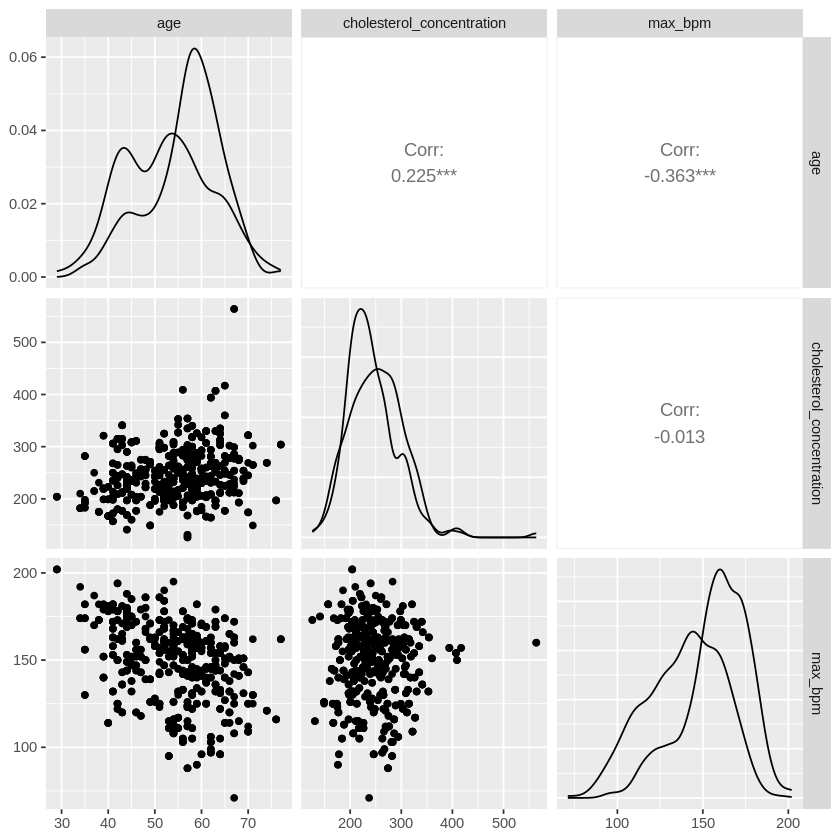

In [24]:
pair_plot <- select(training_set, -diagnosis) |>
             ggpairs(training_set)
pair_plot

# References

Format into APA later:
- https://www.codecademy.com/article/eda-prior-to-fitting-a-classification-model